## 과제정의

미국 인구 조사국에서 수집한 1970 년대 보스턴 시의 주택 가격에 대한 데이터를 통해 주택의 가격에 영향을 미치는 인자를 분석하고자 한다.   
다양한 예측모델을 이용하여 집값에 영향을 주는 영향인자를 객관적으로 도출하고 선정한 영향인자를 활용하여 집값을 예측한다.

다양한 예측 모델을 활용하여 목표변수인 주택가격에 영향을 주는 인자를 도출하고  
분석에서 도출된 영향인자와 사전 검토한 잠재 요인과의 일치 및 방향성 등을 확인하고 정리하고자 한다.  
해당 데이터를 살펴보면 목표변수는 MEDV(주택가격)이며 이에 대한 설명변수는 총 13개 이다.   
설명변수에 대한 설명은 아래와 같다.  

### 변수 설명

* MEDV	주택가격(중앙값)
* CRIM	1인당 범죄율
* ZN	주거지 비율(25000 F^2초과)
* INDUS	비주거 상업지역 비율
* CHAS	강 조망(1-조망,0-비조망)
* NOX	산화질소 농도
* RM	가구당 평균 방 수
* AGE	자기 소유 집 비율(1940년 이전)
* DIS	중심지(직업센터) 접근 거리
* RAD	고속도로 접근성 지수
* TAX	재산세율($10,00당)
* PTRATIO 학생/교사 비율
* B	흑인 인구 비율
* LSTAT	저소득층 비율(%)

## 분석계획 및 가설설정

> *가설1 : 1인당 범죄율이 높을수록 치안에 대한 불안감으로 인해 주택가격이 낮을 것이다.  

> *가설2 : 강 조망인 지역이 비조망인 지역에 비해 조망권에 의해 주택가격이 높게 책정될 것이다  

> *가설3 : 중심지와의 접근 거리가 가까울수록 주택가격이 높게 책정될 것이다.   

> *가설4 : 학생교사비율이 낮을수록 즉, 학생 한명당 교사의 수가 많을수록 주택가격이 높을 것이다.

## 데이터 구성하기

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/home/piai/Downloads/BOSTON_HOUSING.csv', engine = 'python')
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
df['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [4]:
#CHAS 강 조망 변수 object로 변경
df['CHAS'] = df['CHAS'].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    object 
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [6]:
df.describe()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


### 결측치 확인

In [7]:
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

> 결측치 확인 결과 해당 데이터셋에서는 결측치가 존재하지 않는것으로 나타났다

### 이상치 확인

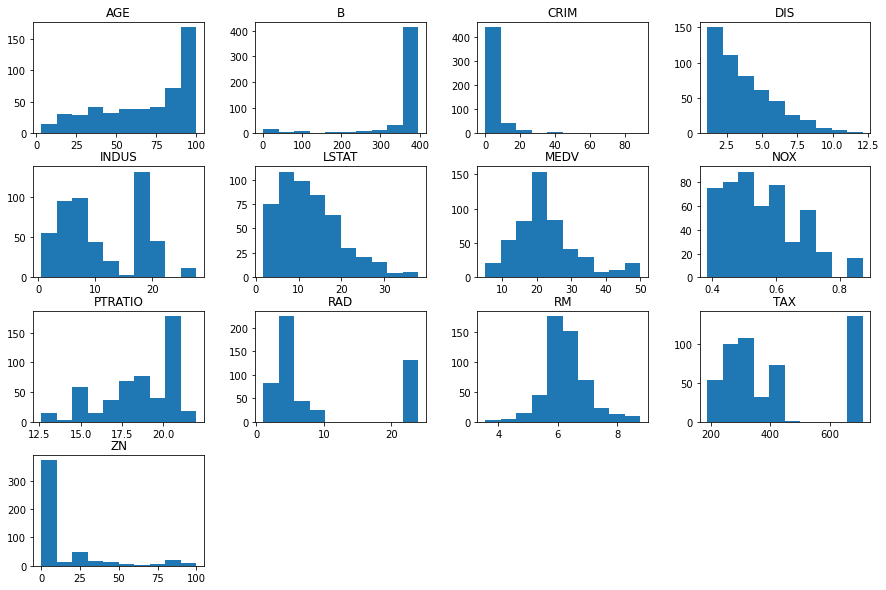

In [24]:
df.hist(bins=10,figsize=(15,10),grid=False)

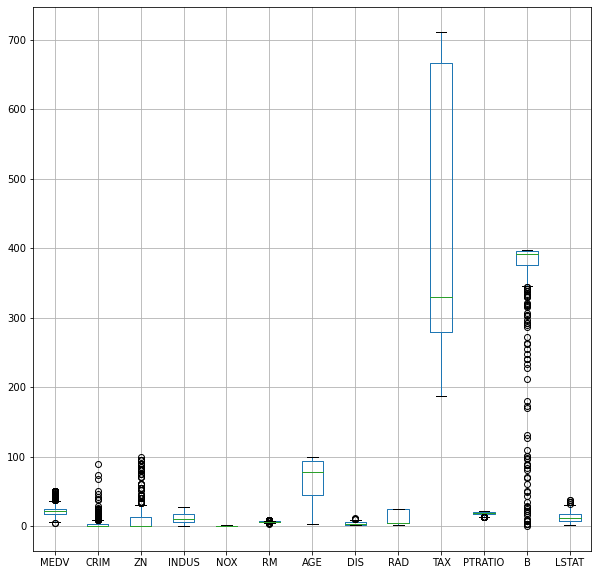

In [9]:
df.boxplot(figsize = (10,10))

### Scale 변환
> 설명변수간 분산을 확인하기 위해 평균, 표준편차를 기준으로 하는 scaling 진행

In [14]:
df_num = df.select_dtypes(exclude = 'object')

#scale 변환 : 평균 , 표준편차 기준
df_scale_std = scale(df_num)
#scale 적용, 변환하면 numpy의 ndarray 형태로 저장 -> DataFrame 으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_num.columns)
df_scale_std.head().round(3)

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.160,-0.420,0.285,-1.288,-0.144,0.414,-0.120,0.140,-0.983,-0.667,-1.459,0.441,-1.076
1,-0.102,-0.417,-0.488,-0.593,-0.740,0.194,0.367,0.557,-0.868,-0.987,-0.303,0.441,-0.492
2,1.324,-0.417,-0.488,-0.593,-0.740,1.283,-0.266,0.557,-0.868,-0.987,-0.303,0.396,-1.209
3,1.183,-0.417,-0.488,-1.307,-0.835,1.016,-0.810,1.078,-0.753,-1.106,0.113,0.416,-1.362
4,1.488,-0.412,-0.488,-1.307,-0.835,1.229,-0.511,1.078,-0.753,-1.106,0.113,0.441,-1.027


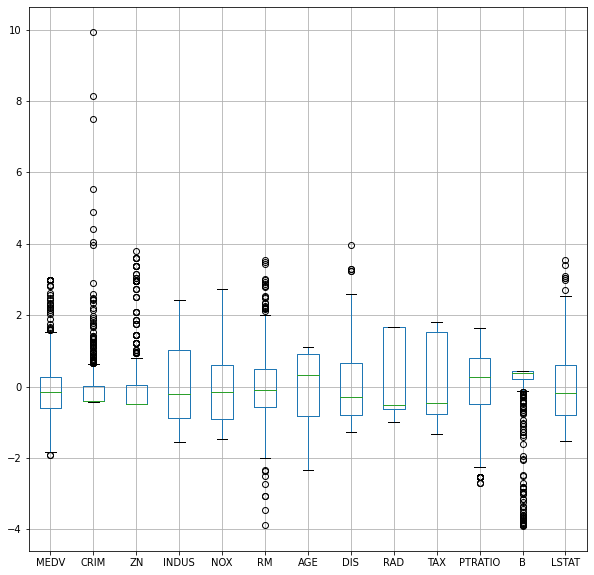

In [15]:
df_scale_std.boxplot(figsize = (10,10))

> CRIM과 B 설명변수에서 1-3사분위수에 벗어나는 데이터들이 존재하고 있음을 알 수 있다.
그러나 CRIM과 B 변수는 보스턴 집값 결정에 있어 중요한 변수라 가정했기에 이상치로 처리하지 않고 데이터 분석을 진행한다.

### 상관계수 분석

In [21]:
df.corr(method='pearson')

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,-0.468536,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


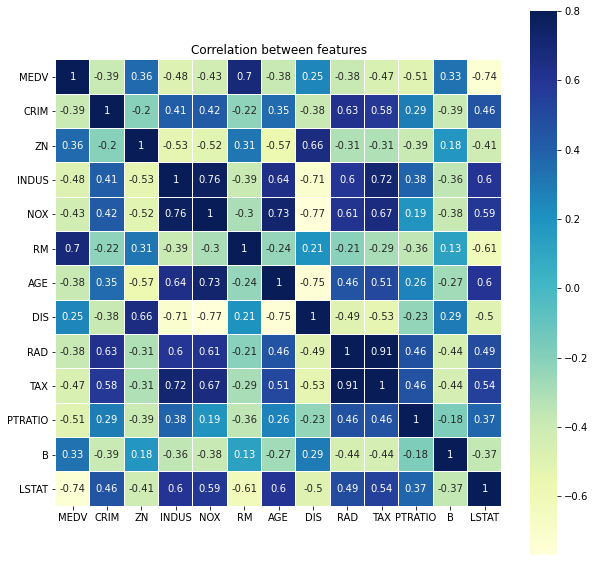

In [31]:
corr=df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

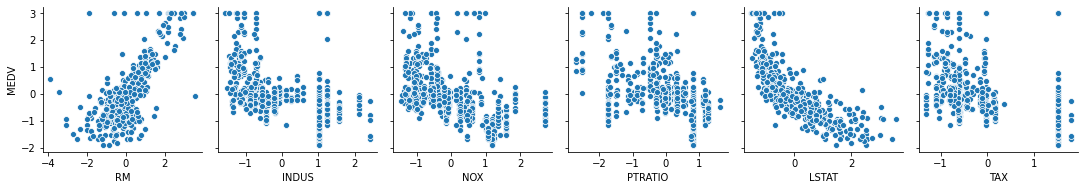

In [33]:
sns.pairplot(y_vars = ['MEDV'], x_vars = ['RM','INDUS','NOX','PTRATIO','LSTAT','TAX'], data =df)

> 상관관계 분석을 통해 MEDV와 상관계수가 높은 변수들만 추출한 결과,  
RM, INDUS, NOX, PIRATIO, LSTAT, TAX 와의 상관관계가 높은것으로 나타났다.

> 이 과정을 통해 앞서 세운 가설들 중 